# ADVANCED MACHINE LEARNING - ARUN KUMAR REDDY KUDURUMALLA 

In [1]:
## loading the required libraries and modules
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd

# visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
from tqdm.notebook import tqdm
# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [2]:
Batch_size = 128
TRAIN_DIR = "C:/Users/jayan/Downloads/CatsDogs/CatsDogsDataset/Train/"
TEST_DIR="C:/Users/jayan/Downloads/CatsDogs/CatsDogsDataset/Test/"
VALIDATION_DIR = "C:/Users/jayan/Downloads/CatsDogs/CatsDogsDataset/Validation/"

### Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?

In [3]:
def load_dataset(directory):
    image_paths = []
    labels = []
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
        print(label, "Completed")
    return image_paths, labels

## 

In [4]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

Cat Completed
Dog Completed


,image,label
0,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Dog
1,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Dog
2,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Dog
3,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Cat
4,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Cat


In [5]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

Cat Completed
Dog Completed


,image,label
0,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Cat
1,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Cat
2,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Cat
3,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Cat
4,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Cat


In [6]:
validation = pd.DataFrame()
validation['image'], validation['label'] = load_dataset(VALIDATION_DIR)
validation.head()

Cat Completed
Dog Completed


,image,label
0,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Cat
1,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Cat
2,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Cat
3,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Cat
4,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Cat


Cat Completed
Dog Completed
Total number of images in the train dataset: 1000


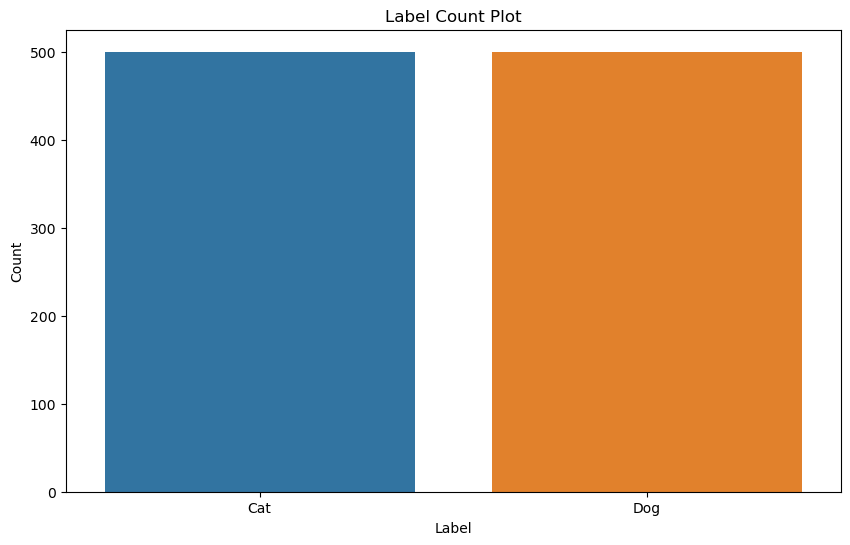

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your 'label' column contains the labels
# Create a DataFrame
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)

# Shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)

# Create a count plot of the labels
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='label')
plt.title('Label Count Plot')
plt.xlabel('Label')
plt.ylabel('Count')

# Print the total number of images
total_images = len(train)
print(f"Total number of images in the train dataset: {total_images}")

plt.show()




Cat Completed
Dog Completed
Total number of images in the test dataset: 500


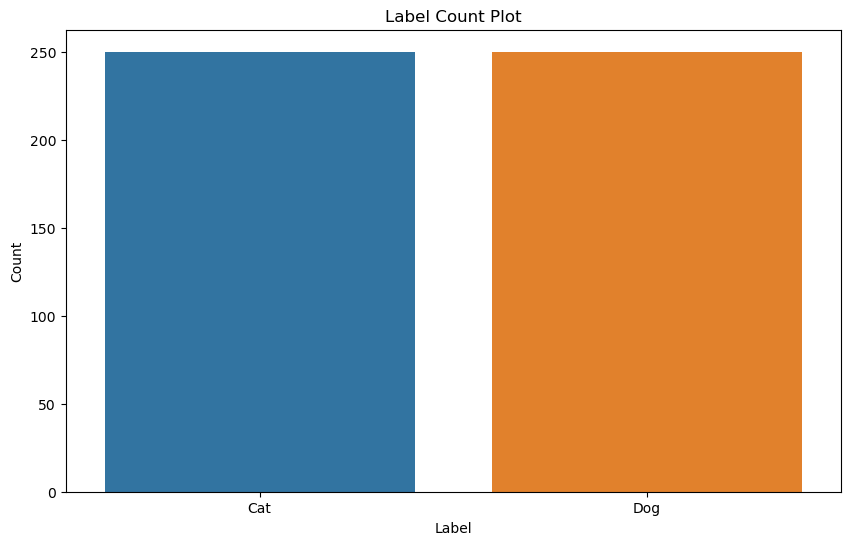

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your 'label' column contains the labels
# Create a DataFrame
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)  # Replace with your TEST_DIR

# Shuffle the dataset (if needed)
test = test.sample(frac=1).reset_index(drop=True)

# Create a count plot of the labels
plt.figure(figsize=(10, 6))
sns.countplot(data=test, x='label')
plt.title('Label Count Plot')
plt.xlabel('Label')
plt.ylabel('Count')

# Print the total number of images
total_images = len(test)
print(f"Total number of images in the test dataset: {total_images}")

plt.show()


Cat Completed
Dog Completed
Total number of images in the validation dataset: 500


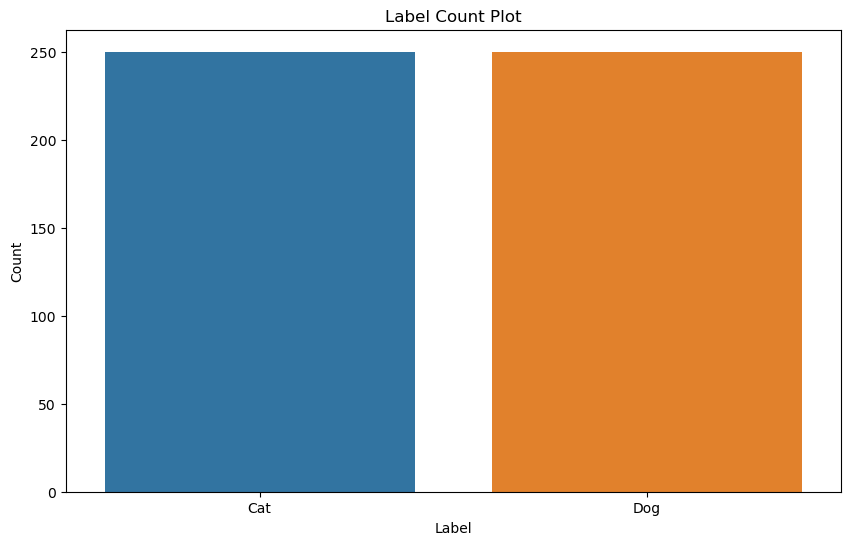

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your 'label' column contains the labels
# Create a DataFrame
validation = pd.DataFrame()
validation['image'], validation['label'] = load_dataset(VALIDATION_DIR)  # Replace with your VALIDATION_DIR

# Shuffle the dataset (if needed)
validation = validation.sample(frac=1).reset_index(drop=True)

# Create a count plot of the labels
plt.figure(figsize=(10, 6))
sns.countplot(data=validation, x='label')
plt.title('Label Count Plot')
plt.xlabel('Label')
plt.ylabel('Count')

# Print the total number of images
total_images = len(validation)
print(f"Total number of images in the validation dataset: {total_images}")

plt.show()


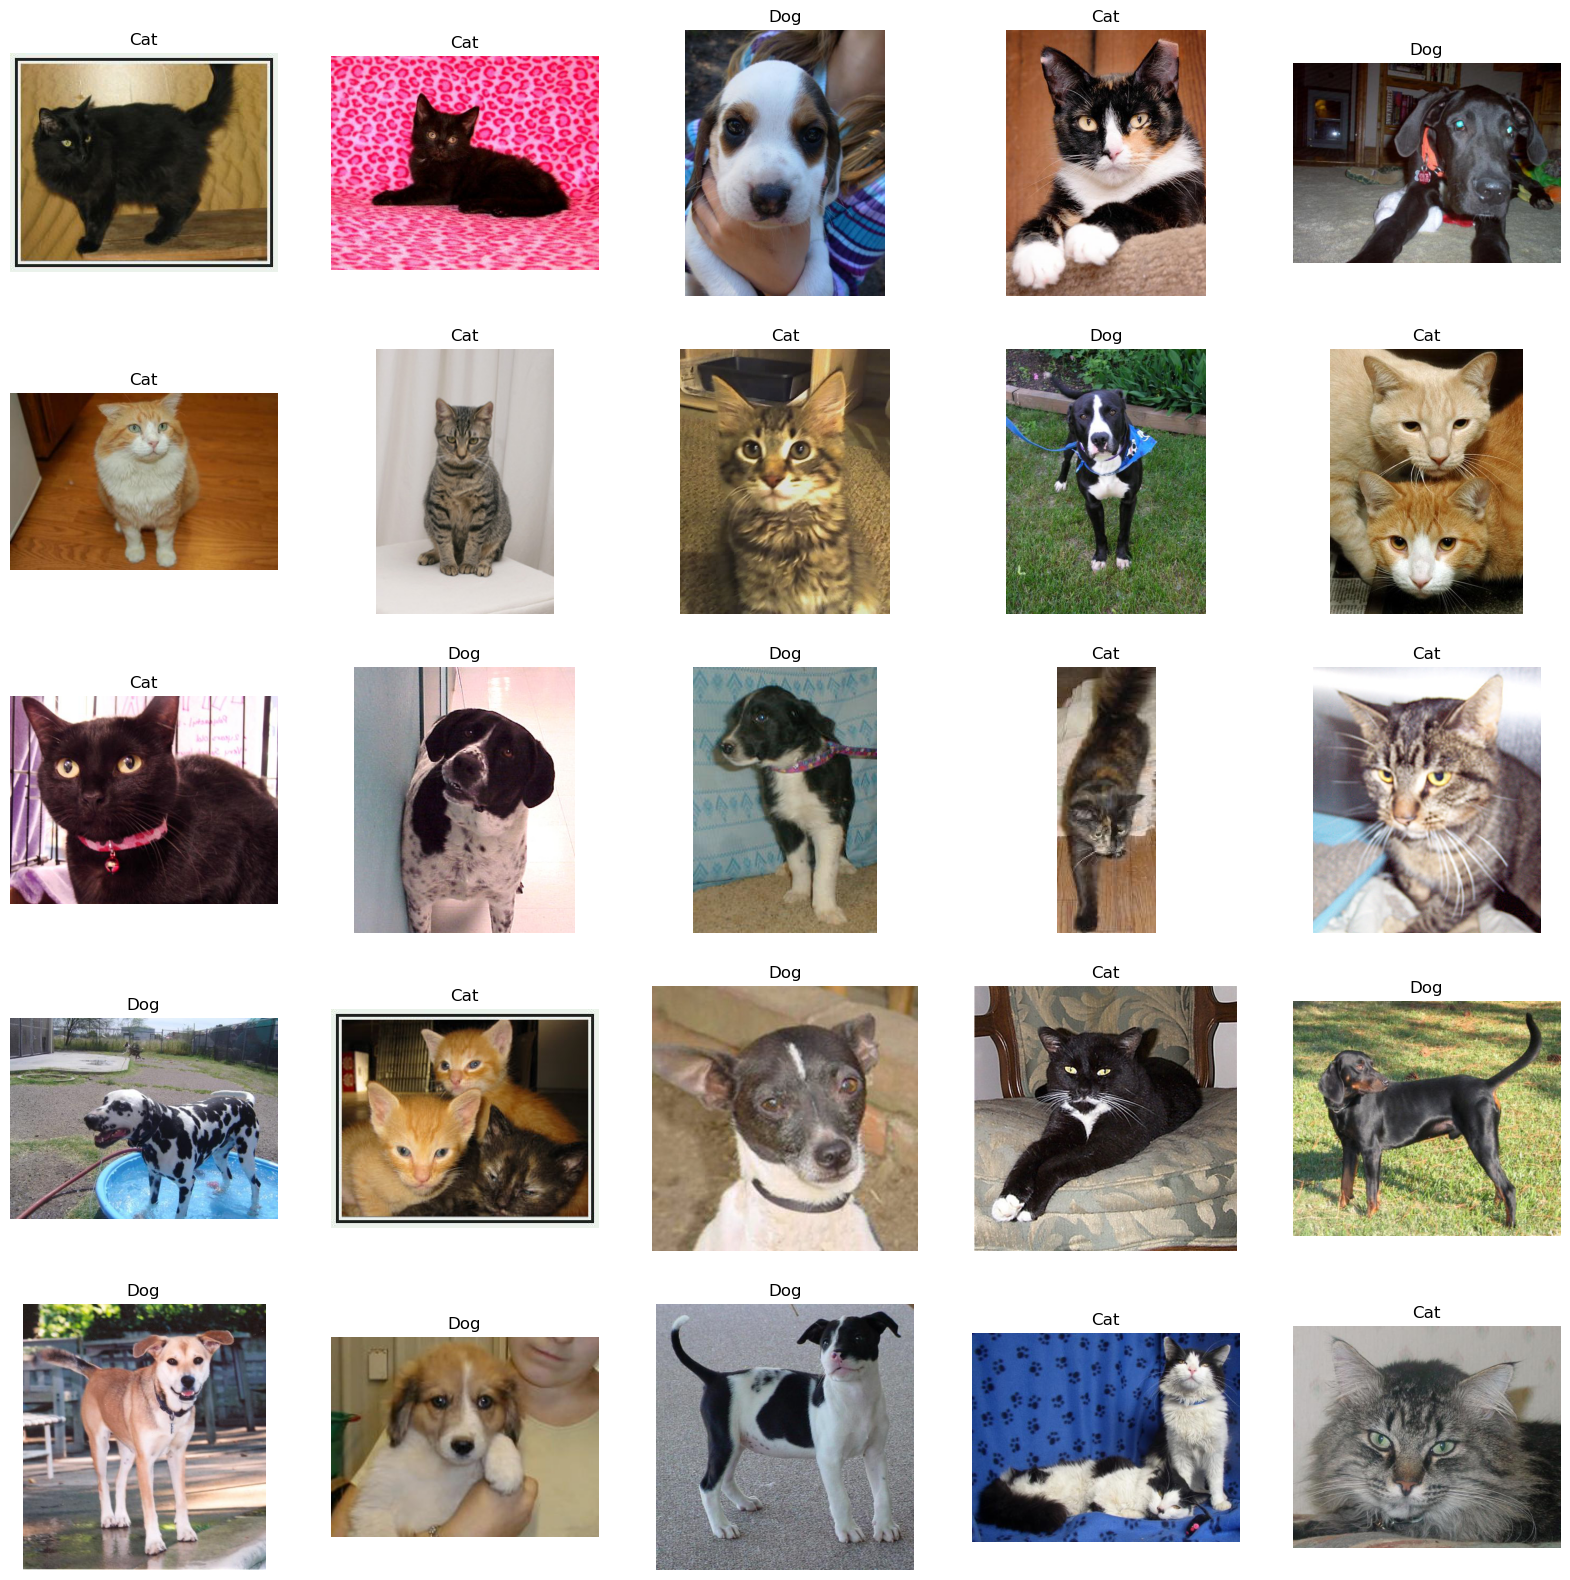

In [10]:
# to display grid of images
from keras.preprocessing.image import load_img
plt.figure(figsize=(20,20))
files = train.iloc[0:25]
for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [11]:
from keras.preprocessing.image import ImageDataGenerator
#preprocess the training data
train_datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)
training_set = train_datagen.flow_from_dataframe(
dataframe=train,
x_col='image',
y_col='label',
target_size=(224, 224),
batch_size=Batch_size,
class_mode='categorical')

Found 1000 validated image filenames belonging to 2 classes.


In [12]:
from keras.preprocessing.image import ImageDataGenerator
#preprocess the training data
test_datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)
testing_set = test_datagen.flow_from_dataframe(
dataframe=test,
x_col='image',
y_col='label',
target_size=(224, 224),
batch_size=Batch_size,
class_mode='categorical')

Found 500 validated image filenames belonging to 2 classes.


In [13]:
from keras.preprocessing.image import ImageDataGenerator
#preprocess the training data
validation_datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)
validation_set = validation_datagen.flow_from_dataframe(
dataframe=validation,
x_col='image',
y_col='label',
target_size=(224, 224),
batch_size=Batch_size,
class_mode='categorical')

Found 500 validated image filenames belonging to 2 classes.


In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))  # Use (224, 224, 3) for RGB images
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))  # Use 1 output unit for binary classification


In [16]:
model_1 = Sequential([
    Conv2D(filters=16,
          kernel_size=3,
          activation='relu',
          input_shape=(224, 224, 3)), 
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(pool_size=2,
             padding='valid'),
    Conv2D(32, 3, activation='relu'),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2),
    Flatten(),
    Dense(2, activation='sigmoid') 
])


model_1.compile(loss='categorical_crossentropy',
             optimizer='adam',
            metrics=['accuracy'])

history_1 = model_1.fit(training_set,
                   epochs=5,
                   steps_per_epoch=len(training_set),
                   validation_data=validation_set,
                   validation_steps=len(validation_set))

Epoch 1/5
5/8 [=================>............] - ETA: 16s - loss: 1.4433 - accuracy: 0.4919

C:\Users\jayan\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


8/8 [==============================] - 62s 8s/step - loss: 1.1720 - accuracy: 0.4870 - val_loss: 0.7117 - val_accuracy: 0.4980
Epoch 2/5
8/8 [==============================] - 41s 5s/step - loss: 0.6981 - accuracy: 0.4880 - val_loss: 0.6856 - val_accuracy: 0.5480
Epoch 3/5
8/8 [==============================] - 43s 5s/step - loss: 0.6856 - accuracy: 0.5490 - val_loss: 0.6733 - val_accuracy: 0.5380
Epoch 4/5
8/8 [==============================] - 40s 5s/step - loss: 0.6719 - accuracy: 0.5930 - val_loss: 0.6802 - val_accuracy: 0.5480
Epoch 5/5
8/8 [==============================] - 42s 5s/step - loss: 0.6540 - accuracy: 0.5950 - val_loss: 0.6608 - val_accuracy: 0.6160


In [17]:
model_1 = Sequential([
    Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(224, 224, 3)), 
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(pool_size=2, padding='valid'),
    Conv2D(32, 3, activation='relu'),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2),
    Flatten(),
    Dense(2, activation='sigmoid') 
])

model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_1 = model_1.fit(
    training_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_data=validation_set,
    validation_steps=len(validation_set)
)


Epoch 1/10
8/8 [==============================] - 42s 5s/step - loss: 1.4567 - accuracy: 0.4890 - val_loss: 0.6947 - val_accuracy: 0.5020
Epoch 2/10
8/8 [==============================] - 40s 5s/step - loss: 0.6990 - accuracy: 0.5050 - val_loss: 0.6802 - val_accuracy: 0.5340
Epoch 3/10
8/8 [==============================] - 42s 5s/step - loss: 0.6750 - accuracy: 0.5800 - val_loss: 0.6668 - val_accuracy: 0.5960
Epoch 4/10
8/8 [==============================] - 40s 5s/step - loss: 0.6672 - accuracy: 0.5930 - val_loss: 0.6705 - val_accuracy: 0.5880
Epoch 5/10
8/8 [==============================] - 41s 5s/step - loss: 0.6492 - accuracy: 0.6510 - val_loss: 0.6436 - val_accuracy: 0.6100
Epoch 6/10
8/8 [==============================] - 41s 5s/step - loss: 0.6283 - accuracy: 0.6610 - val_loss: 0.7044 - val_accuracy: 0.5840
Epoch 7/10
8/8 [==============================] - 42s 5s/step - loss: 0.6223 - accuracy: 0.6420 - val_loss: 0.6036 - val_accuracy: 0.7000
Epoch 8/10
8/8 [==================

In [18]:
model_1.save('model_CNN_Task1.h5')

C:\Users\jayan\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
model_1.evaluate(testing_set)

4/4 [==============================] - 7s 2s/step - loss: 0.6183 - accuracy: 0.6540


[0.6183494329452515, 0.6539999842643738]

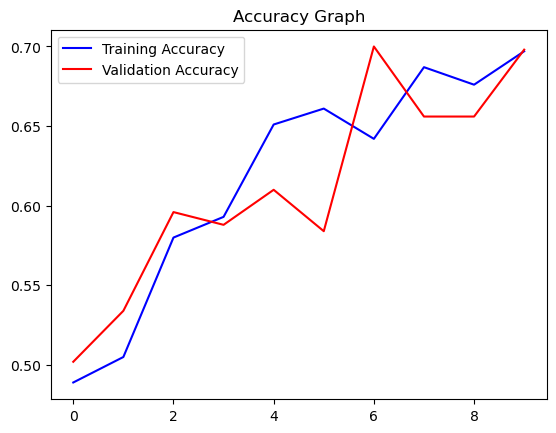

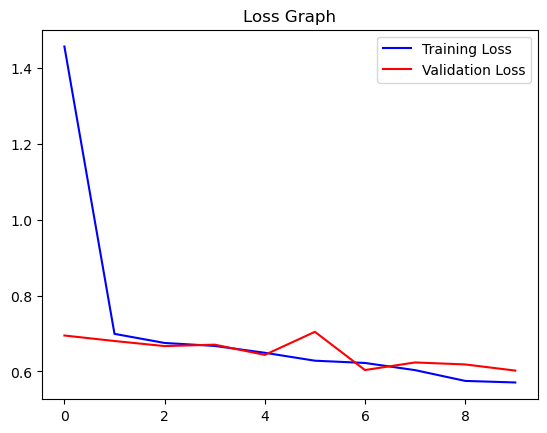

In [20]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

### Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?

In [21]:
TRAIN_V2_DIR = "C:/Users/jayan/Downloads/CatsDogs/CatsDogsDataset/Train_v2/"

In [22]:
train_v2 = pd.DataFrame()
train_v2['image'], train_v2['label'] = load_dataset(TRAIN_V2_DIR)
# shuffle the dataset
train_v2 = train_v2.sample(frac=1).reset_index(drop=True)
train_v2.head()

Cat Completed
Dog Completed


,image,label
0,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Cat
1,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Dog
2,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Cat
3,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Dog
4,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Dog


Cat Completed
Dog Completed
Total number of images in the train dataset: 3000


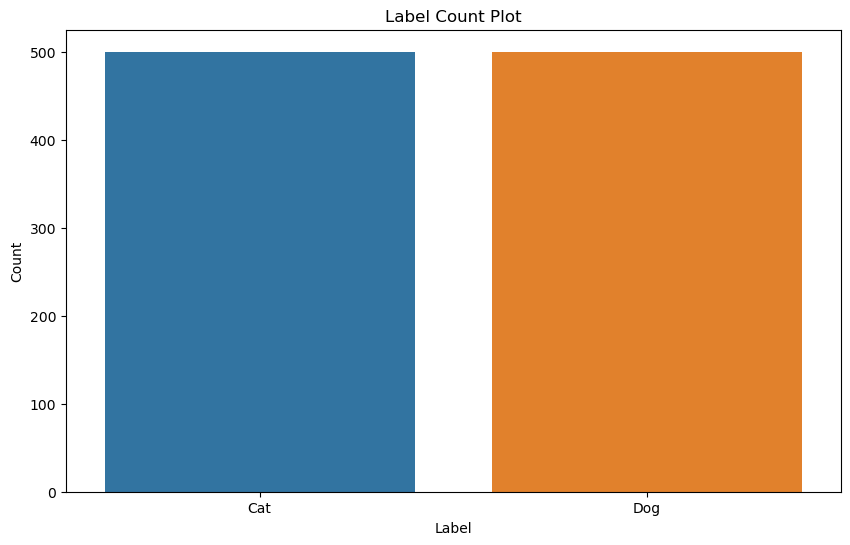

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your 'label' column contains the labels
# Create a DataFrame
train_v2 = pd.DataFrame()
train_v2['image'], train_v2['label'] = load_dataset(TRAIN_V2_DIR)

# Shuffle the dataset
train_v2 = train_v2.sample(frac=1).reset_index(drop=True)

# Create a count plot of the labels
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='label')
plt.title('Label Count Plot')
plt.xlabel('Label')
plt.ylabel('Count')

# Print the total number of images
total_images = len(train_v2)
print(f"Total number of images in the train dataset: {total_images}")

plt.show()


In [24]:
from keras.preprocessing.image import ImageDataGenerator
#preprocess the training data
train_v2_datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)
training_v2_set = train_v2_datagen.flow_from_dataframe(
dataframe=train_v2,
x_col='image',
y_col='label',
target_size=(224, 224),
batch_size=Batch_size,
class_mode='categorical')

Found 3000 validated image filenames belonging to 2 classes.


In [25]:
history_v2 = model_1.fit(
    training_v2_set,
    epochs=10,
    steps_per_epoch=len(training_v2_set),
    validation_data=validation_set,
    validation_steps=len(validation_set)
)

Epoch 1/10
 6/24 [======>.......................] - ETA: 1:20 - loss: 0.5870 - accuracy: 0.6839

C:\Users\jayan\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


24/24 [==============================] - 110s 5s/step - loss: 0.5815 - accuracy: 0.6840 - val_loss: 0.5911 - val_accuracy: 0.7020
Epoch 2/10
24/24 [==============================] - 94s 4s/step - loss: 0.5562 - accuracy: 0.7060 - val_loss: 0.6630 - val_accuracy: 0.6180
Epoch 3/10
24/24 [==============================] - 98s 4s/step - loss: 0.5637 - accuracy: 0.7097 - val_loss: 0.5790 - val_accuracy: 0.7200
Epoch 4/10
24/24 [==============================] - 95s 4s/step - loss: 0.5586 - accuracy: 0.7107 - val_loss: 0.5812 - val_accuracy: 0.6900
Epoch 5/10
24/24 [==============================] - 95s 4s/step - loss: 0.5200 - accuracy: 0.7327 - val_loss: 0.5463 - val_accuracy: 0.7180
Epoch 6/10
24/24 [==============================] - 91s 4s/step - loss: 0.5336 - accuracy: 0.7313 - val_loss: 0.5577 - val_accuracy: 0.7160
Epoch 7/10
24/24 [==============================] - 96s 4s/step - loss: 0.4911 - accuracy: 0.7703 - val_loss: 0.5794 - val_accuracy: 0.7120
Epoch 8/10
24/24 [============

In [28]:
model_1.evaluate(testing_set)

4/4 [==============================] - 5s 1s/step - loss: 0.5930 - accuracy: 0.6900


[0.5929993391036987, 0.6899999976158142]

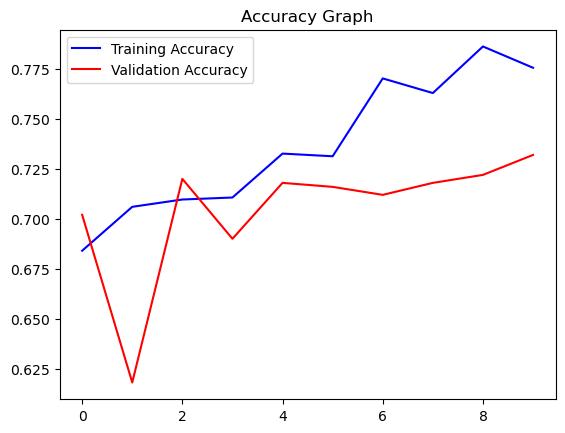

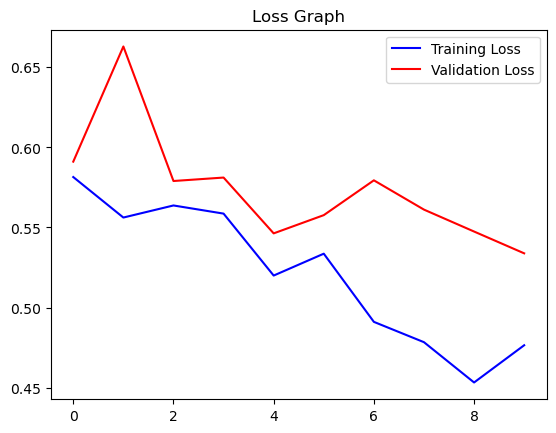

In [29]:
acc = history_v2.history['accuracy']
val_acc = history_v2.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()
loss = history_v2.history['loss']
val_loss = history_v2.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

### Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.

In [37]:
TRAIN_V3_DIR = "C:/Users/jayan/Downloads/CatsDogs/CatsDogsDataset/Train_v3/"

In [38]:
train_v3 = pd.DataFrame()
train_v3['image'], train_v3['label'] = load_dataset(TRAIN_V3_DIR)
# shuffle the dataset
train_v3 = train_v3.sample(frac=1).reset_index(drop=True)
train_v3.head()

Cat Completed
Dog Completed


,image,label
0,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Cat
1,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Cat
2,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Dog
3,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Dog
4,C:/Users/jayan/Downloads/CatsDogs/CatsDogsData...,Dog


Cat Completed
Dog Completed
Total number of images in the train dataset: 6000


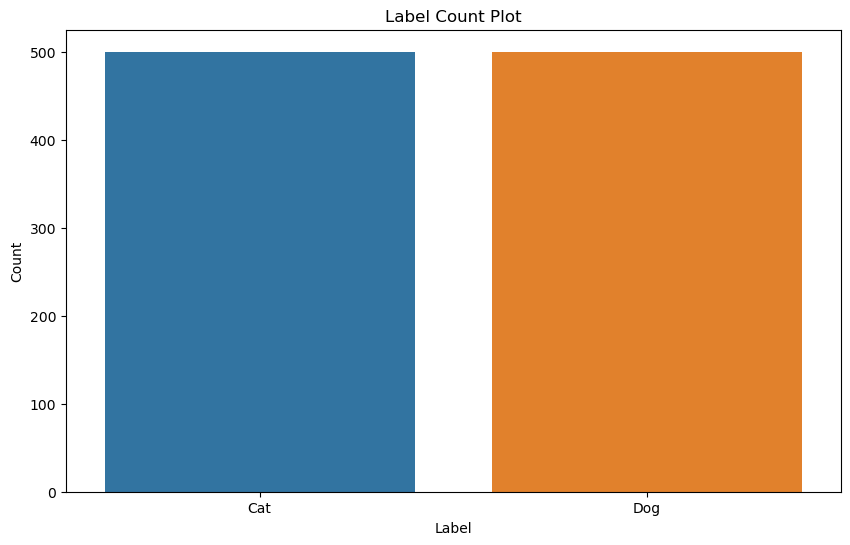

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your 'label' column contains the labels
# Create a DataFrame
train_v3 = pd.DataFrame()
train_v3['image'], train_v3['label'] = load_dataset(TRAIN_V3_DIR)

# Shuffle the dataset
train_v3 = train_v3.sample(frac=1).reset_index(drop=True)

# Create a count plot of the labels
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='label')
plt.title('Label Count Plot')
plt.xlabel('Label')
plt.ylabel('Count')

# Print the total number of images
total_images = len(train_v3)
print(f"Total number of images in the train dataset: {total_images}")

plt.show()

In [40]:
from keras.preprocessing.image import ImageDataGenerator
#preprocess the training data
train_v3_datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)
training_v3_set = train_v3_datagen.flow_from_dataframe(
dataframe=train_v3,
x_col='image',
y_col='label',
target_size=(224, 224),
batch_size=Batch_size,
class_mode='categorical')

Found 6000 validated image filenames belonging to 2 classes.


In [41]:
history_v3 = model_1.fit(
    training_v3_set,
    epochs=10,
    steps_per_epoch=len(training_v3_set),
    validation_data=validation_set,
    validation_steps=len(validation_set)
)

Epoch 1/10
17/47 [=========>....................] - ETA: 2:10 - loss: 0.5183 - accuracy: 0.7459

C:\Users\jayan\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


47/47 [==============================] - 209s 4s/step - loss: 0.4878 - accuracy: 0.7668 - val_loss: 0.5039 - val_accuracy: 0.7460
Epoch 2/10
47/47 [==============================] - 306s 7s/step - loss: 0.4609 - accuracy: 0.7840 - val_loss: 0.5009 - val_accuracy: 0.7640
Epoch 3/10
47/47 [==============================] - 171s 4s/step - loss: 0.4628 - accuracy: 0.7823 - val_loss: 0.5009 - val_accuracy: 0.7680
Epoch 4/10
47/47 [==============================] - 171s 4s/step - loss: 0.4399 - accuracy: 0.7947 - val_loss: 0.4697 - val_accuracy: 0.7660
Epoch 5/10
47/47 [==============================] - 171s 4s/step - loss: 0.4225 - accuracy: 0.8050 - val_loss: 0.4831 - val_accuracy: 0.7660
Epoch 6/10
47/47 [==============================] - 173s 4s/step - loss: 0.4162 - accuracy: 0.8103 - val_loss: 0.4778 - val_accuracy: 0.7880
Epoch 7/10
47/47 [==============================] - 178s 4s/step - loss: 0.3980 - accuracy: 0.8208 - val_loss: 0.4795 - val_accuracy: 0.7620
Epoch 8/10
47/47 [======

In [43]:
model_1.evaluate(testing_set)

4/4 [==============================] - 7s 2s/step - loss: 0.4632 - accuracy: 0.7820


[0.4631633162498474, 0.7820000052452087]

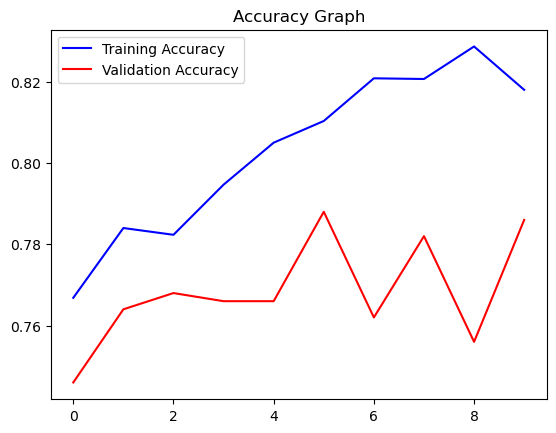

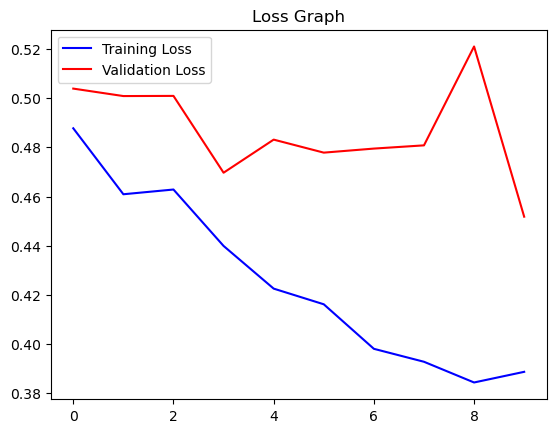

In [57]:
acc = history_v3.history['accuracy']
val_acc = history_v3.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()
loss = history_v3.history['loss']
val_loss = history_v3.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in
Steps 2 and 3 for the pretrained network may be the same or different from those using
the network where you trained from scratch. Again, use any and all optimization
techniques to get best performance

In [48]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam 
img_size = (224, 224) 
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Create a new model on top of VGG16
model_pre = Sequential()
model_pre.add(base_model)
model_pre.add(Flatten())
model_pre.add(Dense(512, activation='relu'))
model_pre.add(Dropout(0.5))
model_pre.add(Dense(2, activation='sigmoid'))

# Compile the model
model_pre.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [50]:
history_pre = model_pre.fit(
    training_v3_set,
    steps_per_epoch=len(training_v3_set),
    epochs=1,
    validation_data=validation_set,
    validation_steps=len(validation_set)
)

47/47 [==============================] - 1409s 30s/step - loss: 0.6161 - accuracy: 0.6615 - val_loss: 0.5707 - val_accuracy: 0.6980


In [53]:
model_pre.evaluate(testing_set)

4/4 [==============================] - 24s 6s/step - loss: 0.5695 - accuracy: 0.6920


[0.5695102214813232, 0.6919999718666077]

### In summary, training CNN models with larger datasets not only exposes the model to more examples but also necessitates careful consideration of optimization techniques to ensure efficient and effective learning. A combination of data size, data diversity, and smart optimization strategies contributes to improved model performance.